# **Music and Mental Health**

---
---

***Data Exploration and Pre-Processing***

***Feature Engineering and Selection***

***Model Selection and Training***

---
---

**Group Members**

Hamna Naveed (346470)

Syeda Sana Zehra Zaidi (339278)

Tanzeel-ur-Rehman (345510)

---
---

##**Data Exploration and Pre-Processing**



---
**Load the dataset and examine the columns, their data types, missing values, duplicate values and class imbalance.**


---



In [ ]:
# IMPORTING REQUIRED LIBRARIES

import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# For encoding textual data to numeric
from sklearn.preprocessing import LabelEncoder

# For scaling
from sklearn.preprocessing import StandardScaler

# For splitting data into training and testing datasets
from sklearn.model_selection import train_test_split

# For checking normal distribution of the dataset
from scipy.stats import jarque_bera
from numpy.random import randn

# For checking linearity of the dataset
from statsmodels.stats.stattools import durbin_watson

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# Machine Learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# For Hyperparameter Tuning
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

# For model persistence
import joblib
from joblib import dump, load




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Reading the CSV file with column names given in the 0th row
df = pd.read_csv('master_song_data.csv', header=0)
df.head()

,Participant_ID,Song_name,Artist,Spotify_ID,Loudness,Valence,Danceability,Acousticness,Instrumental,Audio_class,Lyrics,Sentiment_class,Audio + Lyrics analysis,Total_mental_health,Mental_health_severity_class
0,2,Here again,Elevation Worship,1wuqCUWHniGdEmOKZbQ1cg,-8.210,0.103,0.124,0.0128,0.000000,Sad,Can't go back to the beginning\n Can't control...,Positive,Sad,8,Low
1,2,The Stand,Hillsong United,0j2sui6BmkPy974W3VG3RZ,-8.128,0.133,0.449,0.1470,0.000000,Sad,You stood before creation\n Eternity in your h...,Positive,Sad,8,Low
2,2,Here I Bow,Brian Johnson,3RMcL7vuHuRzJQfMEuoJJP,-7.395,0.218,0.389,0.6780,0.000001,Sad,[Adolf Hitler:]\n Vader... This is your last c...,Positive,Sad,8,Low
3,3,On my way,Alan Walker,5csliehPVWFrDaWJvdSvbB,-5.952,0.295,0.616,0.0480,0.000119,Tense,Today I'm kinda feelin' like a ghost\n Call my...,Positive,"Exciting,Disturbing",15,Med
4,3,Bad guy,Billie Eilish,2Fxmhks0bxGSBdJ92vM42m,-10.965,0.562,0.701,0.3280,0.130000,Relax,"White shirt now red, my bloody nose\n Sleepin'...",Positive,Relax,15,Med


In [ ]:
# Examining columns and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Participant_ID                206 non-null    int64  
 1   Song_name                     206 non-null    object 
 2   Artist                        206 non-null    object 
 3   Spotify_ID                    206 non-null    object 
 4   Loudness                      206 non-null    float64
 5   Valence                       206 non-null    float64
 6   Danceability                  206 non-null    float64
 7   Acousticness                  206 non-null    float64
 8   Instrumental                  206 non-null    float64
 9   Audio_class                   206 non-null    object 
 10  Lyrics                        206 non-null    object 
 11  Sentiment_class               206 non-null    object 
 12  Audio + Lyrics analysis       206 non-null    object 
 13  Total

In [ ]:
# Renaming target variable as 'Target' for convenience
df = df.rename(columns={"Mental_health_severity_class": "Target"})
df.columns

Index(['Participant_ID', 'Song_name', 'Artist', 'Spotify_ID', 'Loudness',
       'Valence', 'Danceability', 'Acousticness', 'Instrumental',
       'Audio_class', 'Lyrics', 'Sentiment_class', 'Audio + Lyrics analysis',
       'Total_mental_health', 'Target'],
      dtype='object')

In [ ]:
irrelevant_colms = ['Participant_ID','Spotify_ID', 'Song_name', 'Artist', 'Lyrics']

for colm in irrelevant_colms:
  df = df.drop(colm, axis=1)

In [ ]:
# Checking for duplicate records
print(df.duplicated().sum())

# Removing duplicates
df.drop_duplicates(inplace=True)

4


In [ ]:
numeric_colms = ['Loudness', 'Valence', 'Danceability', 'Acousticness', 'Instrumental', 'Total_mental_health']
non_numeric_colms = ['Audio_class',	'Sentiment_class',	'Audio + Lyrics analysis', 'Target']

In [ ]:
min = 0
max = 1

# Checking if the values of features are in range

for colm in ['Valence', 'Danceability', 'Acousticness']:
  # Check if each value in the column falls within the specified range
  is_in_range = (df[colm] >= min) & (df[colm] <= max)
  print(f"{colm}: {sum(is_in_range)} values within range")

is_in_range = (df['Loudness'] >= -60) & (df['Loudness'] <=0)
print(f"Loudness: {sum(is_in_range)} values within range")

# Checking if the values of target are in range
is_in_range = (df['Total_mental_health'] >= 0) & (df['Total_mental_health'] <=27)
print(f"Total Mental Health: {sum(is_in_range)} values within range")
print('')

for column in non_numeric_colms:
    unique_values = df[column].unique() # get unique values in the column
    print(f"Column {column} has {len(unique_values)} unique values: {unique_values}")

Valence: 202 values within range
Danceability: 202 values within range
Acousticness: 202 values within range
Loudness: 202 values within range
Total Mental Health: 199 values within range

Column Audio_class has 4 unique values: ['Sad' 'Tense' 'Relax' 'Happy']
Column Sentiment_class has 2 unique values: ['Positive' 'Negative']
Column Audio + Lyrics analysis has 4 unique values: ['Sad' 'Exciting,Disturbing' 'Relax' 'Happy']
Column Target has 3 unique values: ['Low' 'Med' 'High']


The possible range of Total Mental Health according PHQ-9 is 0 to 27. Therefore, the rows with out of range values are removed.

In [ ]:
# Remove records where the specified column has the specified value, modifying the original DataFrame
df.drop(df[df['Total_mental_health'] == 28].index, inplace=True)

# Filter the DataFrame to include only the records where the target value is less than 28
df = df[df['Total_mental_health'] <= 27]

df.describe()

,Loudness,Valence,Danceability,Acousticness,Instrumental,Total_mental_health
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,-8.163688,0.357760,0.522327,0.303768,0.028793,12.859296
std,3.298418,0.220756,0.169762,0.324850,0.139195,3.840284
min,-25.268000,0.036400,0.124000,0.000059,0.000000,7.000000
25%,-9.238000,0.181000,0.400000,0.021450,0.000000,10.000000
50%,-7.831000,0.318000,0.489000,0.147000,0.000000,12.000000
75%,-5.962000,0.499500,0.662000,0.545500,0.000016,15.000000
max,-1.061000,0.930000,0.905000,0.995000,0.924000,23.000000


---

**Convert Categorical Features to Numerical Features using Label Encoding**



---



In [ ]:
le = LabelEncoder()

for colm in ['Audio_class',	'Sentiment_class',	'Audio + Lyrics analysis']:
  df[colm] = le.fit_transform(df[colm])

labels = {'Low': 0, 'Med': 1, 'High':2}

encoder = LabelEncoder().fit(df['Target'])
df['Target'] = df['Target'].map(labels)

df.head()

,Loudness,Valence,Danceability,Acousticness,Instrumental,Audio_class,Sentiment_class,Audio + Lyrics analysis,Total_mental_health,Target
0,-8.210,0.103,0.124,0.0128,0.000000,2,1,3,8,0
1,-8.128,0.133,0.449,0.1470,0.000000,2,1,3,8,0
2,-7.395,0.218,0.389,0.6780,0.000001,2,1,3,8,0
3,-5.952,0.295,0.616,0.0480,0.000119,3,1,0,15,1
4,-10.965,0.562,0.701,0.3280,0.130000,1,1,2,15,1




---

**Checking for Outliers and Handling**



---



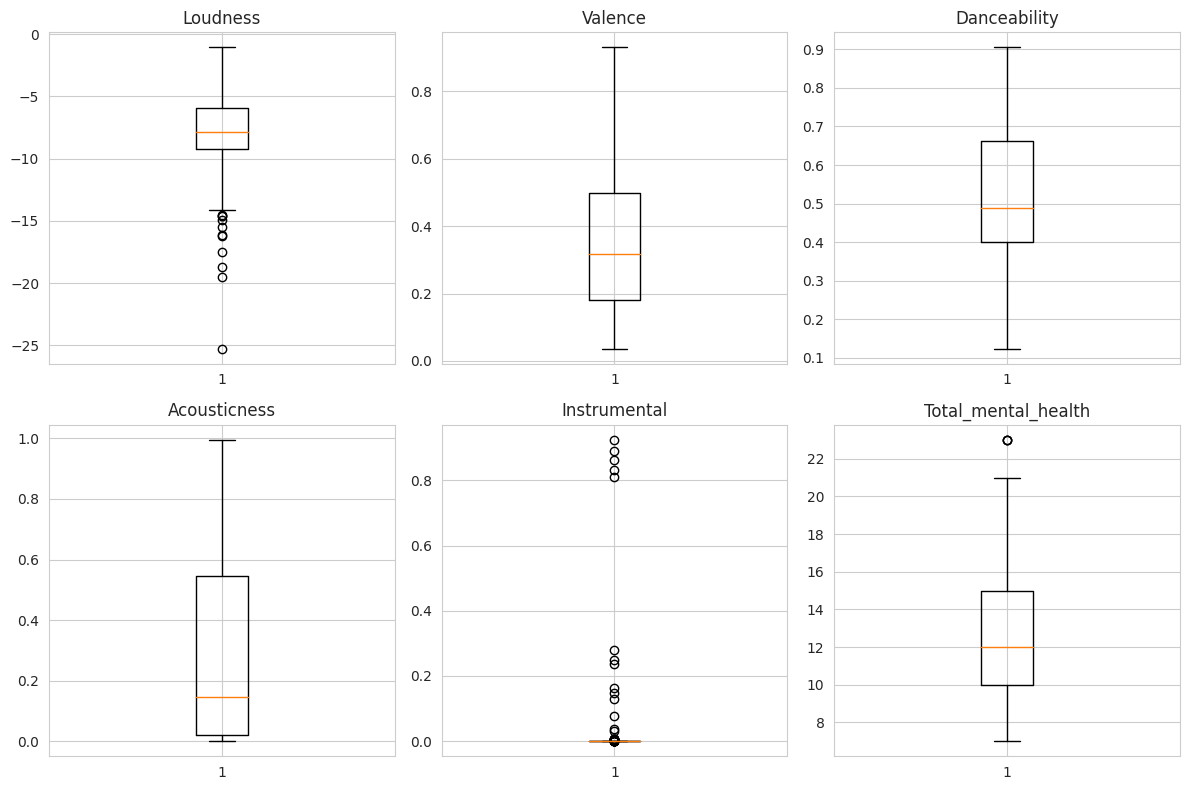

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Creating boxplots for analyzing dataset for outliers
for ax, col in zip(axs.flatten(), numeric_colms):
    ax.boxplot(df[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

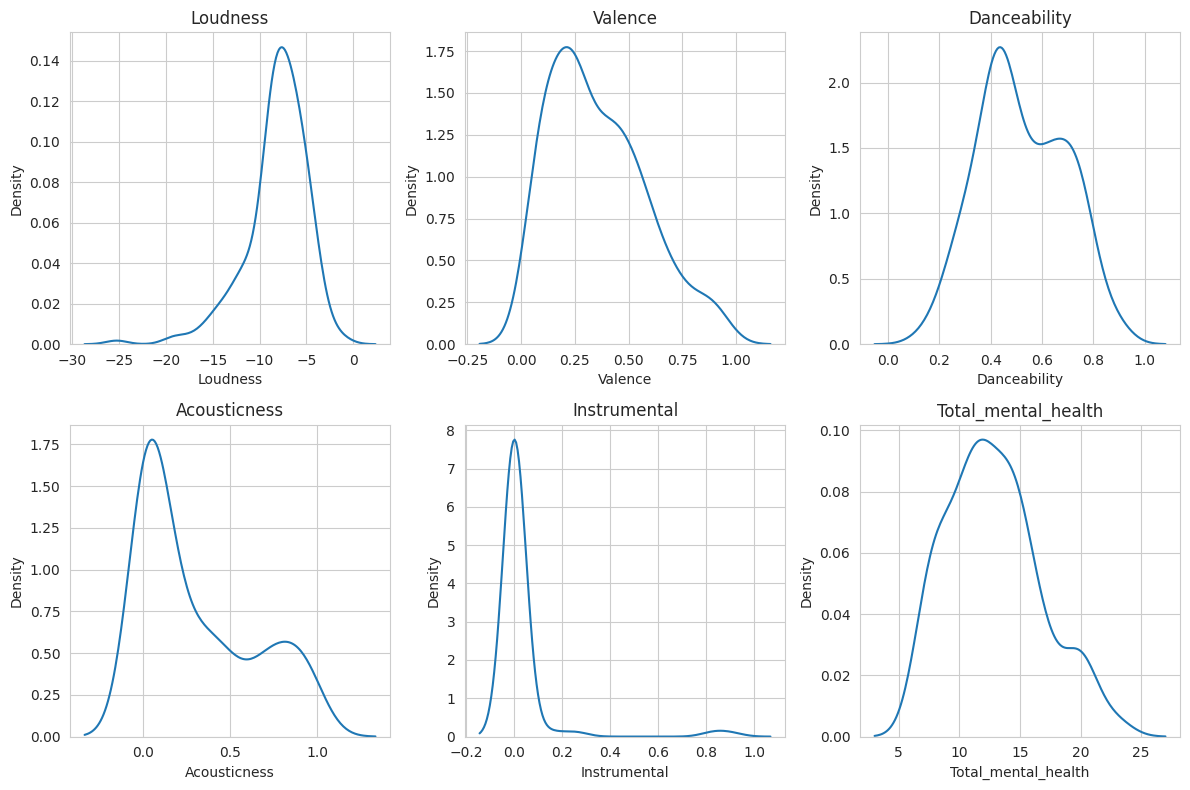

In [ ]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))

# Looping through columns and creating density plot for each
for i, col in enumerate(numeric_colms):
    row = i // 3
    pos = i % 3
    sns.kdeplot(data=df[col], ax=axs[row, pos])
    axs[row, pos].set_title(col)

# Adjusting spacing and displaying plot
plt.tight_layout()
plt.show()

In [ ]:
# Function to count outliers using z-score
def count_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores[z_scores > threshold].count()

# Counting outliers in each column
for col in numeric_colms:
    n_outliers = count_outliers_zscore(df[col])
    print(f"Column {col} has {n_outliers} outliers.")


Column Loudness has 3 outliers.
Column Valence has 0 outliers.
Column Danceability has 0 outliers.
Column Acousticness has 0 outliers.
Column Instrumental has 5 outliers.
Column Total_mental_health has 0 outliers.


In [ ]:
# Loop through non-numeric columns
for col in numeric_colms:
    # Replace outliers with the mean of non-outlier values
    non_outliers = df[col][np.abs(df[col] - np.mean(df[col])) < 2 * np.std(df[col])]
    mean_non_outliers = np.mean(non_outliers)
    df.loc[np.abs(df[col] - np.mean(df[col])) >= 2 * np.std(df[col]), col] = mean_non_outliers

In [ ]:
# Counting outliers in each column
for col in numeric_colms:
    n_outliers = count_outliers_zscore(df[col])
    print(f"Column {col} has {n_outliers} outliers.")

Column Loudness has 0 outliers.
Column Valence has 0 outliers.
Column Danceability has 0 outliers.
Column Acousticness has 0 outliers.
Column Instrumental has 6 outliers.
Column Total_mental_health has 0 outliers.


In [ ]:
# check for zero or negative values
zero_neg_values = (df['Instrumental'] <= 0).sum()
if zero_neg_values > 0:
    # replace zero or negative values with a small positive value
    small_value = 1e-7
    df.loc[df['Instrumental'] <= 0, 'Instrumental'] = small_value

# apply the logarithm transformation
df['Instrumental'] = np.log(df['Instrumental'])

# count the outliers
instrumental_outliers = count_outliers_zscore(df['Instrumental'])
print(f"Column Instrumental has {instrumental_outliers} outliers.")

Column Instrumental has 0 outliers.


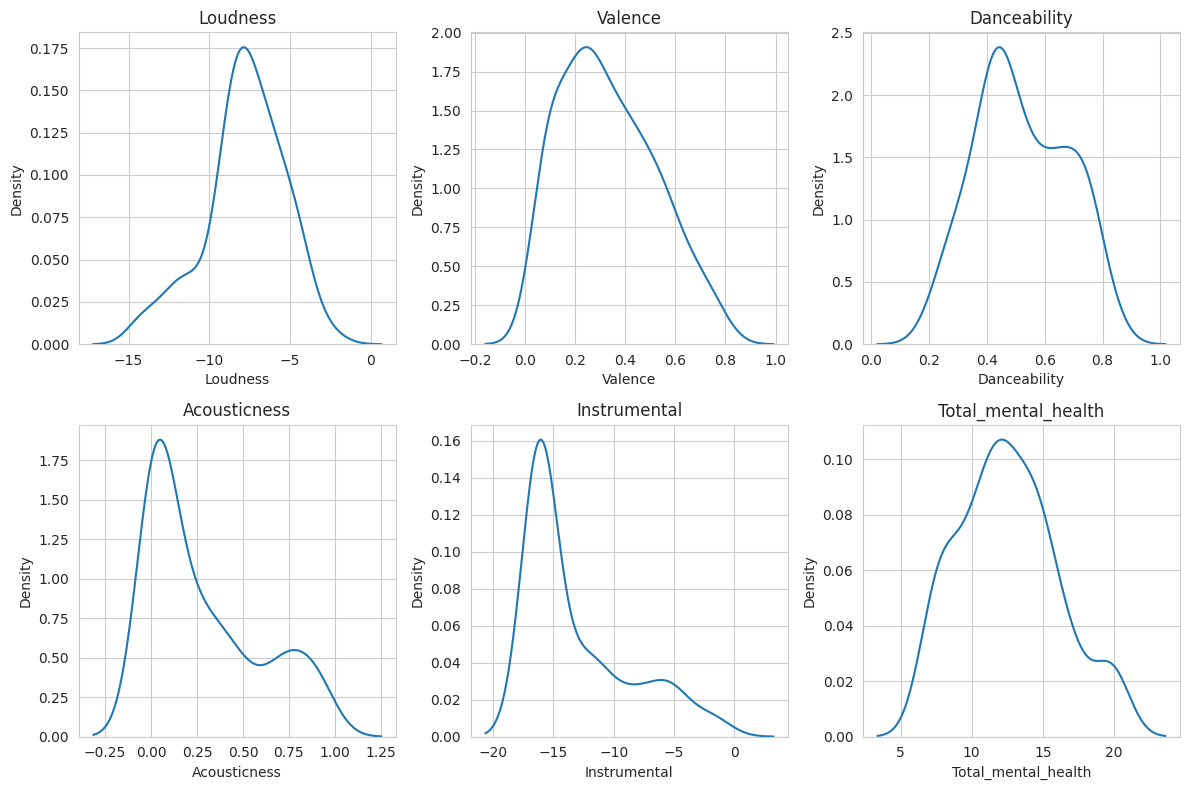

In [ ]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))

# Looping through columns and creating density plot for each
for i, col in enumerate(numeric_colms):
    row = i // 3
    pos = i % 3
    sns.kdeplot(data=df[col], ax=axs[row, pos])
    axs[row, pos].set_title(col)

# Adjusting spacing and displaying plot
plt.tight_layout()
plt.show()


---
**Checking for Class Imbalance**

---



In [ ]:
# Counting the number of samples in each class
class_counts = df["Target"].value_counts()
print(class_counts)

# Computing the class imbalance ratio
imbalance_ratio = class_counts.min() / class_counts.max()

print("Class imbalance ratio:", imbalance_ratio)

1    140
0     41
2     18
Name: Target, dtype: int64
Class imbalance ratio: 0.12857142857142856


###**Observations**
1.   The dataset consists of 199 rows.
2.   There are no missing values.
3.   There are no duplicate records now.
4.   Class is extremely imbalanced (class imbalance ratio < 1).






---


**Dividing the dataset again into training and testing sets**


---


In [ ]:
# Dividing the given columns into target and feature columns
X = df.drop('Target', axis=1)
y = df[['Target']]

# Splitting data into training and testing sets
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
print('X_train dimension = ', X_train.shape)
print('X_test dimension = ', X_test.shape)
print('y_train dimension = ', y_train.shape)
print('y_test dimension = ', y_test.shape)

X_train dimension =  (159, 9)
X_test dimension =  (40, 9)
y_train dimension =  (159, 1)
y_test dimension =  (40, 1)


---

**Scaling**


---

In [ ]:
# Scaling the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---

**Handling Class Imbalance**


---



In [ ]:
# Synthetic Minority Over-sampling Technique (SMOTE)
smote = SMOTE(random_state=42)

X, y = smote.fit_resample(df.drop('Target', axis = 1), df['Target'])

# Converting smotes to dataframes
X_smote_df = pd.DataFrame(X, columns=X.columns)
y_smote_df = pd.DataFrame(y, columns=['Target'])

# Joining X_smote_df and y_smote_df back to df
df = pd.concat([X_smote_df, y_smote_df], axis=1)



---

**Ensuring class imbalance has been removed**


---



In [ ]:
# Counting the number of samples in each class
class_counts = df["Target"].value_counts()
print(class_counts)

# Computing the class imbalance ratio
imbalance_ratio = class_counts.min() / class_counts.max()

print("Class imbalance ratio:", imbalance_ratio)

0    140
1    140
2    140
Name: Target, dtype: int64
Class imbalance ratio: 1.0




---

**Checking for Normal Distribution of the Data**

---



In [ ]:
# Performing Jarque-Bera test for normality
stats, p = jarque_bera(df)

if p > 0.05:
    print('Normally distributed')
else:
    print('Not normally distributed')

Not normally distributed


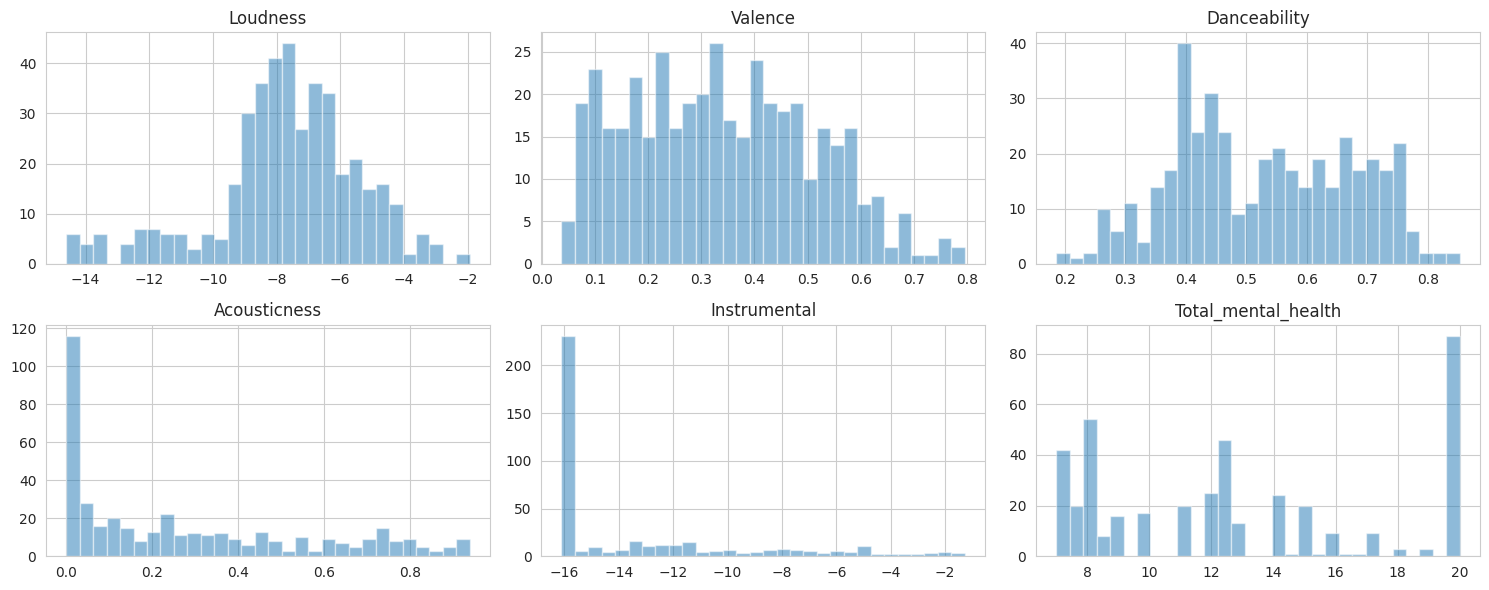

In [ ]:
# Calculate the number of rows and columns needed for the plot
n_cols = 3
n_rows = math.ceil(len(numeric_colms) / n_cols)

# Set the size of the plot
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*3))

# Flatten the axs array to make it easier to iterate over
axs = axs.ravel()

# Create a histogram for each column in the dataframe
for i, col in enumerate(numeric_colms):
    axs[i].hist(df[col], bins=30, alpha=0.5)
    axs[i].set_title(col)

# Remove any unused axes
for i in range(len(numeric_colms), len(axs)):
    axs[i].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()




---



**Using Durbin-Watson test to check if the dataset is Linear**



---



In [ ]:
# Computing the Durbin-Watson test statistic
dw_statistic = np.apply_along_axis(durbin_watson, 0, X)

# Checking if the data is linear
if np.all(dw_statistic > 1.5) and np.all(dw_statistic < 2.5):
    print("The data is linear")
else:
    print("The data is not linear")

The data is not linear


##**Feature Engineering and Selection**



---



**Using Correlation Feature Selection with Heatmap to identify the most Important Features**



---



Computing correlation matrix using spearman method because the data is not normal

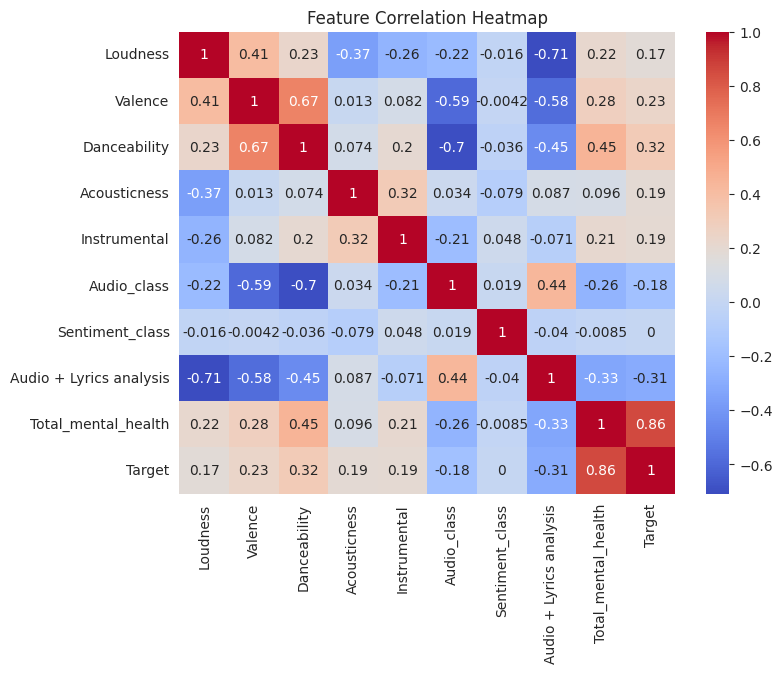

In [ ]:
# Computing the correlation matrix
corr_matrix = df.corr(method='spearman')

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

###**Observations**
1.   Sentiment_class has no correlation with the target variable; therfore it can be eliminated




---

**Dimensionality Reduction**


---


In [ ]:
drop_colms = ['Sentiment_class']
for colm in drop_colms:
  df = df.drop(colm, axis=1)  

df.head()

,Loudness,Valence,Danceability,Acousticness,Instrumental,Audio_class,Audio + Lyrics analysis,Total_mental_health,Target
0,-8.210,0.103,0.520371,0.0128,-16.118096,2,3,8.0,0
1,-8.128,0.133,0.449000,0.1470,-16.118096,2,3,8.0,0
2,-7.395,0.218,0.389000,0.6780,-13.530332,2,3,8.0,0
3,-5.952,0.295,0.616000,0.0480,-9.036387,3,0,15.0,1
4,-10.965,0.562,0.701000,0.3280,-2.040221,1,2,15.0,1


---


**Dividing the dataset again into training and testing sets after handling Dimentionality Reduction**


---

In [ ]:
# Dividing the given columns into target and feature columns
X = df.drop('Target', axis=1)
y = df[['Target']]

# Splitting data into training and testing sets
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
print('X_train dimension = ', X_train.shape)
print('X_test dimension = ', X_test.shape)
print('y_train dimension = ', y_train.shape)
print('y_test dimension = ', y_test.shape)

X_train dimension =  (336, 8)
X_test dimension =  (84, 8)
y_train dimension =  (336, 1)
y_test dimension =  (84, 1)


###**Observations**

1.   The dataset is non-linear.

##**Model Selection and Training**

---
**Dataset Charachteristics**

---

1.   Small
2.   Non-Linear
3.   Not Normally Distributed
4.   Multi-Class Target Variable


---
**Conclusion**

---

The following models are suitable for our dataset:

1.   Decision Tree
2.   K-Nearest Neighbours
3.   Support Vector Machine



---

**Comparison of Different Machine Learning Algorithms for our Dataset**

---



In [ ]:
# Storing models for comparison
comparison_models = []

# Storing accuracies for comparison
train_accuracies = []
test_accuracies = []

dtc = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(random_state=42)

models = [dtc, knn, svm]

for model in models:
    
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Comparing training and testing accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    print(model.__class__.__name__)
    print(f"Training Accuracy: {train_acc:.3f}")
    print(f"Testing Accuracy: {test_acc:.3f}")
    print('-'*50)

    comparison_models.append(model)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)


DecisionTreeClassifier
Training Accuracy: 1.000
Testing Accuracy: 0.976
--------------------------------------------------
KNeighborsClassifier
Training Accuracy: 0.952
Testing Accuracy: 0.869
--------------------------------------------------
SVC
Training Accuracy: 0.848
Testing Accuracy: 0.762
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###**Comparison of Various Models**


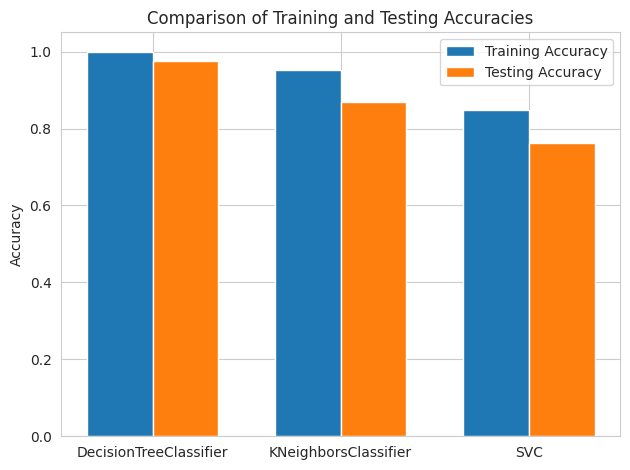

In [ ]:
# Creating a bar chart of training and testing accuracies
labels = [model.__class__.__name__ for model in comparison_models]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Testing Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Testing Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [ ]:
# Removing models with overfitting
comparison_models.pop()
comparison_models.pop()

train_accuracies.pop()
train_accuracies.pop()

test_accuracies.pop()
test_accuracies.pop()

print(comparison_models)
print(train_accuracies)
print(test_accuracies)

[DecisionTreeClassifier(random_state=42)]
[1.0]
[0.9761904761904762]


**Improved SVC** 

Overfitting in the initial SVC model is handled by early stopping.

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Parameters for early stopping
    max_iter = 50                         # maximum number of iterations
    tol = 1e-4                            # tolerance for convergence
    n_no_improvement = 5                  # maximum number of iterations with no improvement in validation score

    best_val_score = 0
    no_improvement_count = 0

    # Training the SVM classifier with early stopping
    for i in range(max_iter):
        svm.fit(X_train, y_train)
        train_score = svm.score(X_train, y_train)
        val_score = svm.score(X_test, y_test)
        
        # Checking for early stopping
        if val_score > best_val_score:
            best_val_score = val_score
            no_improvement_count = 0

        else:
            no_improvement_count += 1

        if no_improvement_count >= n_no_improvement:
            print("Validation score has not improved for {} iterations. Stopping training...".format(n_no_improvement))
            break

    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)
    
    # Comparing training and testing accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print('Training accuracy:', train_acc)
    print('Testing accuracy:', test_acc)
    
    comparison_models.append(svm)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

Validation score has not improved for 5 iterations. Stopping training...
Training accuracy: 0.8482142857142857
Testing accuracy: 0.7619047619047619


**Improved KNN** 

To select the best value of k, we have compared the training and testing accuracies for each value of k and selected the value of k that resulted in the minimum difference between the two accuracies.

k = 3, Training Accuracy: 0.96, Test Accuracy: 0.86, Difference: 0.11
k = 5, Training Accuracy: 0.95, Test Accuracy: 0.87, Difference: 0.08
k = 7, Training Accuracy: 0.94, Test Accuracy: 0.88, Difference: 0.06
k = 9, Training Accuracy: 0.90, Test Accuracy: 0.88, Difference: 0.02
Best model has k = 9, with difference between test and train accuracy of 0.02
KNeighborsClassifier()


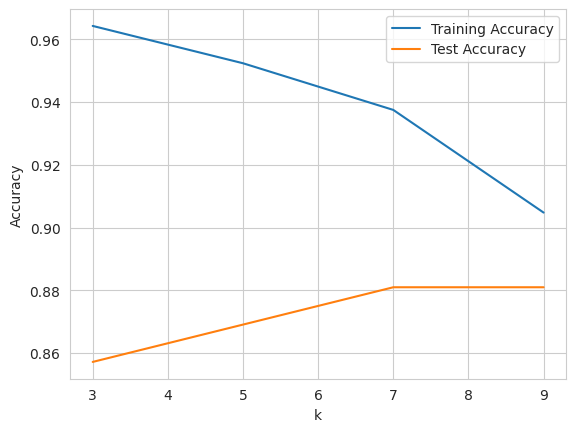

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Initialize empty lists to store the results
    train_accs = []
    test_accs = []
        
    # Define a list of k values to try
    k_values = [3, 5, 7, 9]

    # Initialize variables to store the best model and difference between test and train accuracy
    best_model = None
    min_diff = float('inf')

    # Loop over the k values and evaluate the model on training and test data
    for k in k_values:
        # Train the model on the training set
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        
        # Store the results in the lists
        train_accs.append(train_acc)
        test_accs.append(test_acc)

        # Compute the difference between test and train accuracy
        diff = abs(test_acc - train_acc)
        
        # Check if the current model has a smaller difference and satisfies the condition
        if diff < min_diff and diff < 0.4:
            best_model = knn
            min_diff = diff
            best_k = k
        
        # Print the results for each model
        print("k = %d, Training Accuracy: %0.2f, Test Accuracy: %0.2f, Difference: %0.2f" % (k, train_acc, test_acc, diff))
        
    # Print the best model and k value
    print("Best model has k = %d, with difference between test and train accuracy of %0.2f" % (best_k, min_diff))
    print(best_model)

    knn = best_model
    comparison_models.append(knn)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    # Plot the results
    plt.plot(k_values, train_accs, label="Training Accuracy")
    plt.plot(k_values, test_accs, label="Test Accuracy")
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

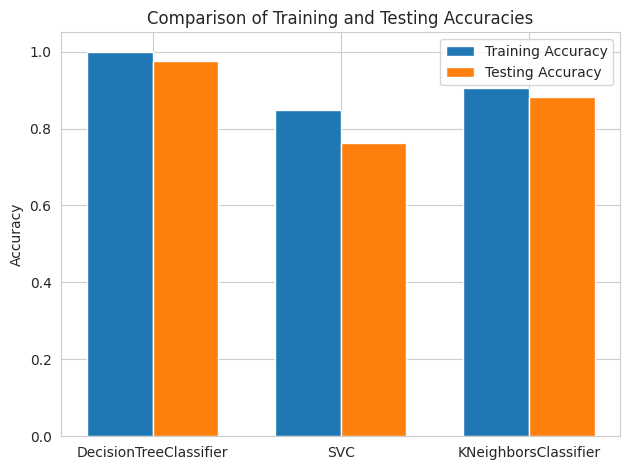

In [ ]:
# Creating a bar chart of training and testing accuracies
labels = [model.__class__.__name__ for model in comparison_models]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Testing Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Testing Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


---

**Comparison of Decision Tree, KNN and SVC after Handling Overfitting**

---


Decision Tree depicts Low Variance-Low Bias tradeoff. This means that the model is consistent and highly accurate on prediction. Taking under consideration the tradeoff and the results shown by the graph, it is concluded that Decision Tree best suits our problem. 

##**Model Improvement**



---

**Hyperparameter Tuning of Decision Tree** 

---



|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | 0.9881    | 19.71     | 5.766     | 3.416     |
| 2         | 0.9881    | 11.01     | 2.979     | 16.68     |
| 3         | 0.9881    | 8.783     | 2.952     | 15.18     |
| 4         | 0.9881    | 6.608     | 13.24     | 5.539     |
| 5         | 0.9881    | 13.57     | 16.54     | 14.8      |
| 6         | 0.619     | 1.12      | 19.38     | 2.179     |
| 7         | 0.9881    | 12.55     | 9.009     | 8.883     |
| 8         | 0.9881    | 7.754     | 3.312     | 2.0       |
| 9         | 0.9881    | 4.881     | 11.85     | 20.0      |
| 10        | 0.9881    | 20.0      | 17.13     | 4.176     |
| 11        | 0.9881    | 20.0      | 9.765     | 20.0      |
| 12        | 0.9643    | 20.0      | 1.0       | 12.59     |
| 13        | 0.619     | 1.0       | 5.391     | 9.531     |
| 14        | 0.9881    | 12.79     | 10.61     | 2.0       |
| 15    

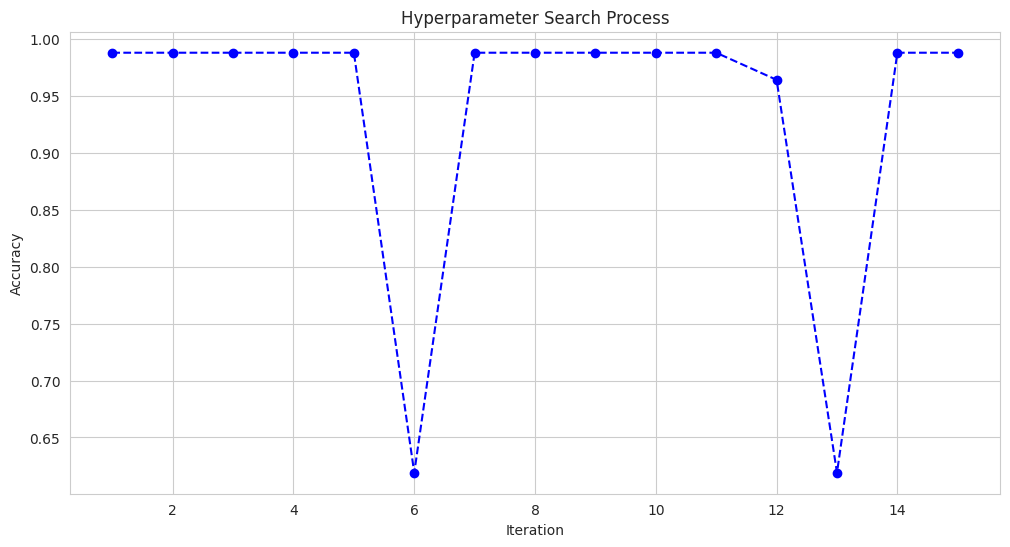

In [ ]:

# Define the objective function for optimization
def dt_objective_function(max_depth, min_samples_split, min_samples_leaf):
    dt = DecisionTreeClassifier(max_depth=int(max_depth), min_samples_split=int(min_samples_split), 
                                min_samples_leaf=int(min_samples_leaf), random_state=42)
    
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return score

# Set up the parameter ranges for Bayesian optimization
pbounds = {'max_depth': (1, 20), 'min_samples_split': (2, 20), 'min_samples_leaf': (1, 20)}

# Create the Bayesian optimization object and maximize the objective function
dt_bo = BayesianOptimization(dt_objective_function, pbounds)
dt_bo.maximize(n_iter=10, init_points=5)

# Print the best parameters and score
print("Best parameters: ", dt_bo.max['params'])
print("Best score: ", dt_bo.max['target'])

# Visualize the hyperparameter search process
plt.figure(figsize=(12,6))
plt.plot(np.arange(1, len(dt_bo.res)+1), [x['target'] for x in dt_bo.res], color='blue', marker='o', linestyle='--')
plt.title('Hyperparameter Search Process')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()




---


**Best Model**



---



In [ ]:
# Retrieve the best hyperparameters and create a new DecisionTreeClassifier object with them
best_params = dt_bo.max['params']
dt_best = DecisionTreeClassifier(max_depth=int(best_params['max_depth']), 
                                 min_samples_split=int(best_params['min_samples_split']), 
                                 min_samples_leaf=int(best_params['min_samples_leaf']), 
                                 random_state=42)

#f Fit the best model to the training data and make predictions on new data
dt_best.fit(X_train, y_train)
y_pred = dt_best.predict(X_test)

# Print evaluation metrics for the best model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9880952380952381
Precision: 0.9885361552028219
Recall: 0.9880952380952381
F1 score: 0.988113064932472


##**Model Deployment**

---


**Training Model on Entire Dataset**



---

In [ ]:
dt_best.fit(X, y)

DecisionTreeClassifier(max_depth=19, min_samples_leaf=5, min_samples_split=3,
                       random_state=42)

---


**Save the Model**



---

In [ ]:
filename = 'dt.joblib'
dump(dt_best, filename)

['dt.joblib']

In [ ]:
# Load the model
model = joblib.load('dt.joblib')

# Use the model
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9880952380952381
Precision: 0.9885361552028219
Recall: 0.9880952380952381
F1 score: 0.988113064932472


In [ ]:
# Define an example input
example_input = [[-5.952,	0.295,	0.616000,	0.0480,	-9.036387,	3,	0,	15.0]]

# Use the model to make a prediction on the example input
prediction = model.predict(example_input)

# Print the prediction
print(prediction)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
